<a href="https://colab.research.google.com/github/leon-czarlinski/IowaLiquorSales/blob/main/BigQuery_IowaSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'big-dataite-5324-0gb' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=big-dataite-5324-0gb:US:bquxjob_3c79c043_18a8ccf865b)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_59209ca6_18a916d597d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
  invoice_and_item_number,
  date,
  store_number,
  store_name,
  address,
  city,
  zip_code,
  store_location,
  category_name,
  vendor_name,
  item_description,
  state_bottle_cost,
  state_bottle_retail,
  bottles_sold,
  sale_dollars,
  volume_sold_liters
FROM
  `bigquery-public-data.iowa_liquor_sales.sales`
WHERE
  sale_dollars > 0
  AND date >= '2022-01-01'
  AND date <= '2022-12-31'
  AND category_name LIKE '%VODKA'


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_59209ca6_18a916d597d') # Job ID inserted based on the query results selected to explore
sales_df = job.to_dataframe()
sales_df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-46557300002,2022-04-18,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA STRAWBERRY LEMONADE,13.40,20.10,6,120.60,10.5
1,INV-47814600015,2022-05-26,5651,SUPER QUICK MART / WINDSOR HEIGHTS,7690 HICKMAN RD,WINDSOR HEIGHTS,50324.0,POINT(-93.722436 41.614669),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
2,INV-45202600108,2022-07-25,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,POINT(-91.658576 41.955859),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
3,INV-53374800061,2022-11-25,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,POINT(-91.15984 40.81294),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5
4,INV-48206800030,2022-06-09,3722,WAL-MART 1361 / SIOUX CITY,3400 SINGING HILLS BLVD,SIOUX CITY,51106,POINT(-96.364164 42.436118),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162555,INV-51767000031,2022-10-04,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,12,287.52,12.0
162556,INV-43579500042,2022-01-06,5102,WILKIE LIQUORS,724 1ST ST SE,MOUNT VERNON,52314.0,POINT(-91.410401 41.918328),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0
162557,INV-52892600050,2022-11-09,3773,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401.0,POINT(-91.65989 41.97575),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0
162558,INV-44617300017,2022-02-10,2594,HY-VEE FOOD STORE / SIOUX CITY,4500 SERGEANT ROAD,SIOUX CITY,51106.0,POINT(-96.346969 42.447396),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,1,23.96,1.0


# Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
sales_df.describe()

,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
count,162560.000000,162560.000000,162560.0,162560.000000,162560.000000
mean,8.301049,12.453774,8.252331,100.175112,5.876358
std,4.456008,6.684430,10.998461,148.742645,8.924220
min,1.130000,1.700000,1.0,1.700000,0.050000
25%,7.000000,10.500000,2.0,25.480000,1.500000
50%,8.250000,12.380000,6.0,66.390000,3.000000
75%,9.010000,13.520000,12.0,135.000000,9.000000
max,906.500000,1359.750000,840.0,9353.760000,630.000000


In [6]:
sales_df.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-46557300002,2022-04-18,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA STRAWBERRY LEMONADE,13.40,20.10,6,120.60,10.5
1,INV-47814600015,2022-05-26,5651,SUPER QUICK MART / WINDSOR HEIGHTS,7690 HICKMAN RD,WINDSOR HEIGHTS,50324.0,POINT(-93.722436 41.614669),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
2,INV-45202600108,2022-07-25,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,POINT(-91.658576 41.955859),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
3,INV-53374800061,2022-11-25,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,POINT(-91.15984 40.81294),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5
4,INV-48206800030,2022-06-09,3722,WAL-MART 1361 / SIOUX CITY,3400 SINGING HILLS BLVD,SIOUX CITY,51106,POINT(-96.364164 42.436118),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5


In [7]:
sales_df.shape

(162560, 16)

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162560 entries, 0 to 162559
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  162560 non-null  object 
 1   date                     162560 non-null  dbdate 
 2   store_number             162560 non-null  object 
 3   store_name               162560 non-null  object 
 4   address                  162499 non-null  object 
 5   city                     162499 non-null  object 
 6   zip_code                 162499 non-null  object 
 7   store_location           147596 non-null  object 
 8   category_name            162560 non-null  object 
 9   vendor_name              162560 non-null  object 
 10  item_description         162560 non-null  object 
 11  state_bottle_cost        162560 non-null  float64
 12  state_bottle_retail      162560 non-null  float64
 13  bottles_sold             162560 non-null  Int64  
 14  sale

# Exploratory Data Analysis

Let's explore the dataset to answer the following questions:
* What is the best month for sales?
* What city had the highest number of sales?
* What product are most often sold together?
* What product was sold the most and why?

In [9]:
df = sales_df.copy()
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-46557300002,2022-04-18,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA STRAWBERRY LEMONADE,13.40,20.10,6,120.60,10.5
1,INV-47814600015,2022-05-26,5651,SUPER QUICK MART / WINDSOR HEIGHTS,7690 HICKMAN RD,WINDSOR HEIGHTS,50324.0,POINT(-93.722436 41.614669),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
2,INV-45202600108,2022-07-25,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,POINT(-91.658576 41.955859),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5
3,INV-53374800061,2022-11-25,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,POINT(-91.15984 40.81294),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5
4,INV-48206800030,2022-06-09,3722,WAL-MART 1361 / SIOUX CITY,3400 SINGING HILLS BLVD,SIOUX CITY,51106,POINT(-96.364164 42.436118),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162555,INV-51767000031,2022-10-04,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,12,287.52,12.0
162556,INV-43579500042,2022-01-06,5102,WILKIE LIQUORS,724 1ST ST SE,MOUNT VERNON,52314.0,POINT(-91.410401 41.918328),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0
162557,INV-52892600050,2022-11-09,3773,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401.0,POINT(-91.65989 41.97575),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0
162558,INV-44617300017,2022-02-10,2594,HY-VEE FOOD STORE / SIOUX CITY,4500 SERGEANT ROAD,SIOUX CITY,51106.0,POINT(-96.346969 42.447396),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,1,23.96,1.0


In [10]:
import pandas as pd
df['month'] = pd.to_datetime(df['date']).dt.month
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,month
0,INV-46557300002,2022-04-18,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA STRAWBERRY LEMONADE,13.40,20.10,6,120.60,10.5,4
1,INV-47814600015,2022-05-26,5651,SUPER QUICK MART / WINDSOR HEIGHTS,7690 HICKMAN RD,WINDSOR HEIGHTS,50324.0,POINT(-93.722436 41.614669),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5,5
2,INV-45202600108,2022-07-25,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,POINT(-91.658576 41.955859),IMPORTED FLAVORED VODKA,PERNOD RICARD USA,ABSOLUT CITRON,19.99,29.99,6,179.94,10.5,7
3,INV-53374800061,2022-11-25,3562,WAL-MART 0797 / W BURLINGTON,324 WEST AGENCY RD,WEST BURLINGTON,52655.0,POINT(-91.15984 40.81294),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5,11
4,INV-48206800030,2022-06-09,3722,WAL-MART 1361 / SIOUX CITY,3400 SINGING HILLS BLVD,SIOUX CITY,51106,POINT(-96.364164 42.436118),IMPORTED FLAVORED VODKA,CONSTELLATION BRANDS INC,SVEDKA BLUE RASPBERRY,13.40,20.10,6,120.60,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162555,INV-51767000031,2022-10-04,4829,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT(-93.61374 41.605828),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,12,287.52,12.0,10
162556,INV-43579500042,2022-01-06,5102,WILKIE LIQUORS,724 1ST ST SE,MOUNT VERNON,52314.0,POINT(-91.410401 41.918328),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0,1
162557,INV-52892600050,2022-11-09,3773,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401.0,POINT(-91.65989 41.97575),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA RAZBERI,15.97,23.96,12,287.52,12.0,11
162558,INV-44617300017,2022-02-10,2594,HY-VEE FOOD STORE / SIOUX CITY,4500 SERGEANT ROAD,SIOUX CITY,51106.0,POINT(-96.346969 42.447396),IMPORTED FLAVORED VODKA,STOLI GROUP,STOLICHNAYA BLUEBERI,15.97,23.96,1,23.96,1.0,2


In [11]:
month_sales = df.groupby('month')[['sale_dollars', 'volume_sold_liters', 'bottles_sold']].sum()
month_sales

,sale_dollars,volume_sold_liters,bottles_sold
month,,,
1,1022505.32,62058.07,84075
2,1037440.25,62677.12,86741
3,1216700.02,72543.65,102695
4,1522120.32,88087.66,127312
5,1472415.95,87325.39,121227
6,1703743.65,98209.76,138905
7,1476995.21,86531.14,119032
8,1616842.83,92036.64,132214
9,1323796.15,77948.56,111569


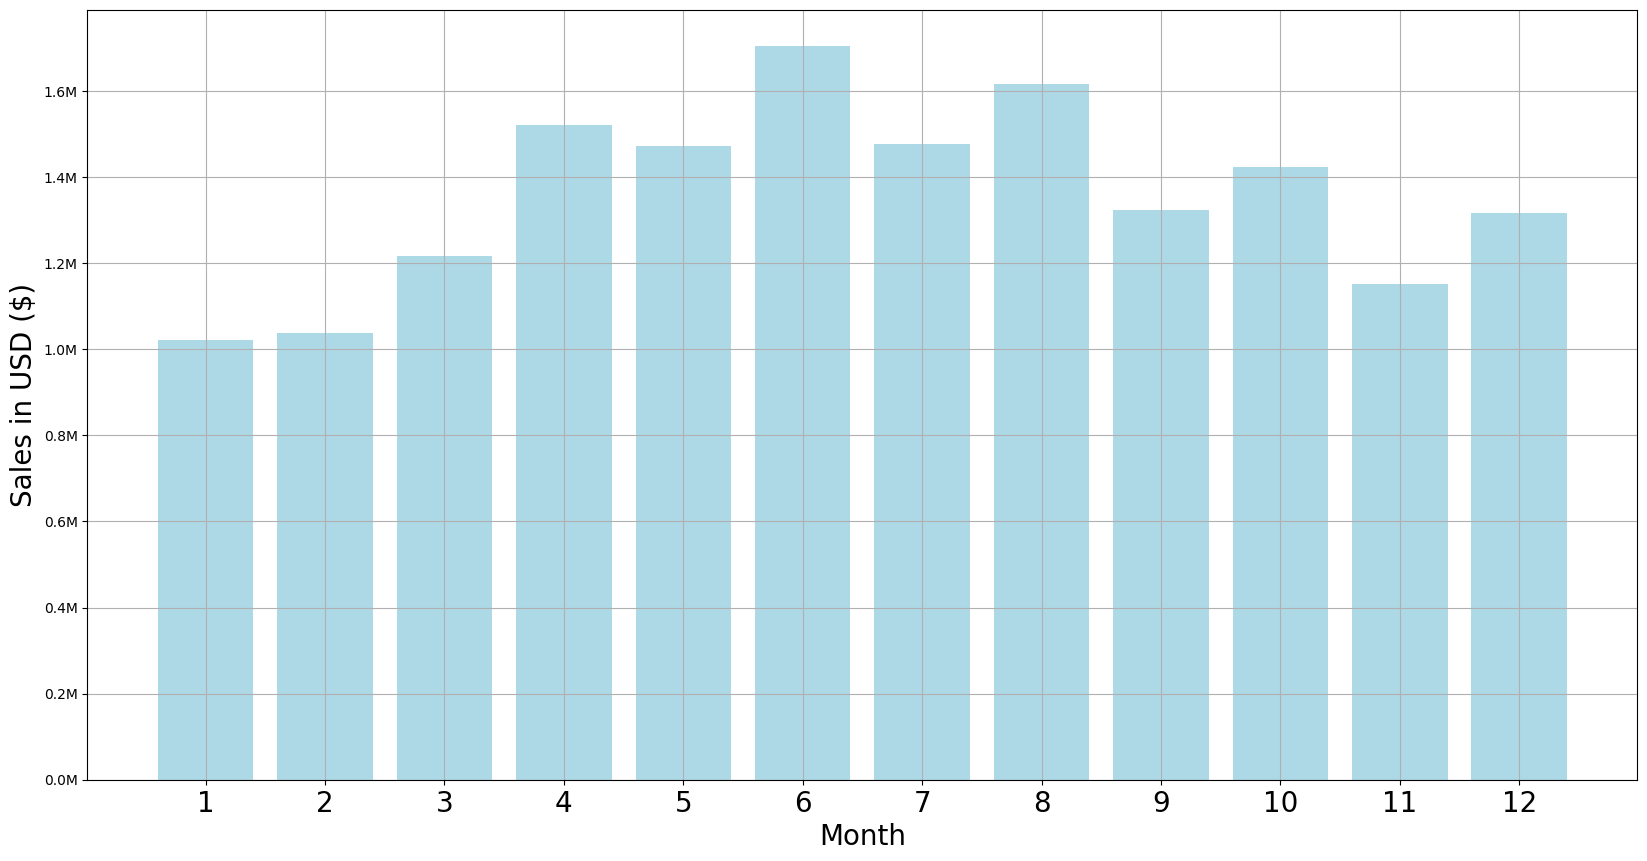

In [14]:
from matplotlib.ticker import FuncFormatter
from matplotlib.projections.geo import Formatter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

months = range (1,13)
months

def millions_formatter(x, pos):
  return f'{x/1e6:.1f}M'

plt.figure(figsize=(20,10))
plt.bar(months, month_sales['sale_dollars'], color='lightblue')
plt.xticks(months, size=20)
plt.ylabel('Sales in USD ($)', size = 20)
plt.xlabel('Month', size = 20)
plt.grid()

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
